In [1]:
pip install yfinance==0.1.70

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
initial_data = yf.download("XRP-USD", start="2021-04-01", end="2022-04-01") # downlading the data from yahoo finacne


[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()#showing the first 5 data information


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,0.566833,0.579228,0.544746,0.573869,0.573869,4849764990
2021-04-01,0.573959,0.595817,0.559002,0.579292,0.579292,4725008531
2021-04-02,0.579360,0.617382,0.575203,0.616569,0.616569,5404854336
2021-04-03,0.616779,0.653350,0.587748,0.590915,0.590915,6757992981
2021-04-04,0.590909,0.646977,0.583013,0.646729,0.646729,4613898769


In [5]:
initial_data[['Adj Close']].head()


,Adj Close
Date,
2021-03-31,0.573869
2021-04-01,0.579292
2021-04-02,0.616569
2021-04-03,0.590915
2021-04-04,0.646729


In [6]:
data =  initial_data[['Adj Close']]
data.head()


,Adj Close
Date,
2021-03-31,0.573869
2021-04-01,0.579292
2021-04-02,0.616569
2021-04-03,0.590915
2021-04-04,0.646729


In [7]:
data.describe().round(2)   #showig data description


,Adj Close
count,366.00
mean,0.95
std,0.26
min,0.53
25%,0.76
50%,0.89
75%,1.10
max,1.84


array([<AxesSubplot:xlabel='Date'>], dtype=object)

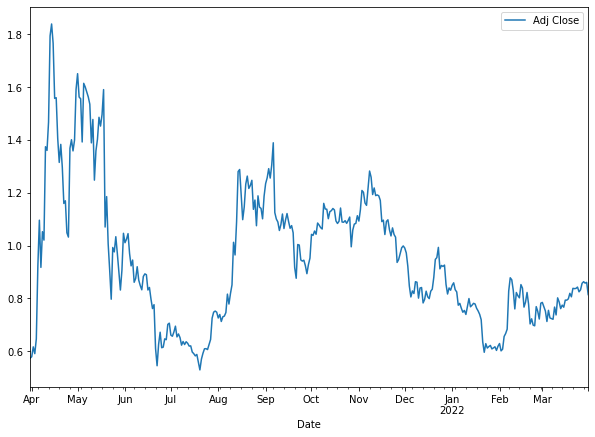

In [8]:
data.plot(figsize=(10, 7), subplots=True) #plotting the movement of the stock


In [9]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1)) #calculating the volaltilty of the stock


In [10]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')


The daily volatility is 6.87 %


In [11]:
vol = np.sqrt(252) * log_return.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 109.01 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

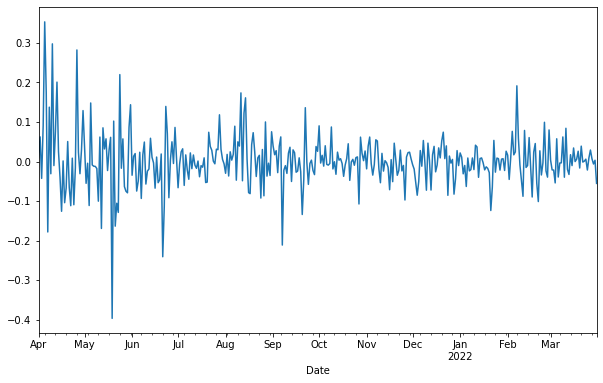

In [12]:
log_return.dropna(inplace=True) #volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [13]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 78.28 %


In [14]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility

The first six months volatility is 152.41 %


# Question 2


# METHODOLOGY

# Binomial Tree


In [17]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  # getting the spot price

The spot price is 0.81


In [18]:
S0 = 0.81              # spot stock price
K = 1.0               # strike price
T = 1/12                 # time to maturity 
r = 0.0169                 # risk free rate 
sig = 1.09               # annaulised volatility
N = 5                   # number of time steps of the tree
payoff = "call"          # payoff 

In [19]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u 

In [20]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [21]:
S


array([[0.81      , 0.93239136, 1.07327611, 1.23544861, 1.42212545,
        1.63700924],
       [0.        , 0.70367447, 0.81      , 0.93239136, 1.07327611,
        1.23544861],
       [0.        , 0.        , 0.61130588, 0.70367447, 0.81      ,
        0.93239136],
       [0.        , 0.        , 0.        , 0.53106215, 0.61130588,
        0.70367447],
       [0.        , 0.        , 0.        , 0.        , 0.4613517 ,
        0.53106215],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40079187]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

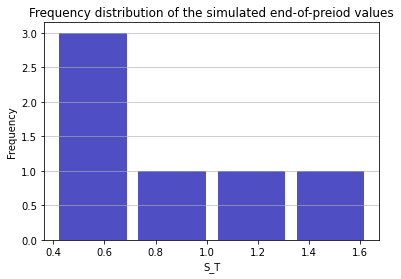

In [22]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [23]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 0.2386800232333998


# MONTE CARLO SIMULATION

In [25]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [26]:
T = 1/12
r = 0.0169
sigma = 1.09
S0 = 0.81
K = 1.0

In [27]:
S = mcs_simulation_np(10000)    #number of simulations

In [28]:
S = np.transpose(S)
S


array([[0.81      , 0.81289431, 0.81376301, ..., 0.58495748, 0.58798469,
        0.59046471],
       [0.81      , 0.81464434, 0.8094803 , ..., 0.79802712, 0.79743291,
        0.79657606],
       [0.81      , 0.80851168, 0.81159308, ..., 0.72792014, 0.72603452,
        0.72396175],
       ...,
       [0.81      , 0.81031582, 0.81116945, ..., 0.39120754, 0.3902745 ,
        0.39135764],
       [0.81      , 0.80761642, 0.81032442, ..., 0.65756865, 0.65681792,
        0.65801092],
       [0.81      , 0.81159842, 0.80723597, ..., 0.81845397, 0.82061729,
        0.82069246]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

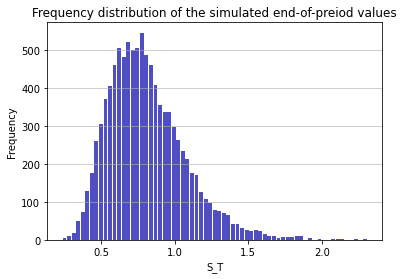

In [29]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [30]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 0.23146085610869085


# GREEKS

# DELTA

In [31]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [32]:
delta(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call') # value of delta

0.30511705141331974

In [33]:
S = np.linspace(0.2, 2.0, 11) #plotting the 3d graph of delta
T = np.linspace(0.5, 2, 11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')

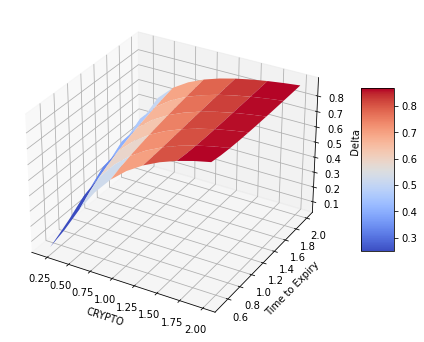

In [34]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [35]:
S = np.linspace(0.5,2,11)  #plotting the 2d graph 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
    

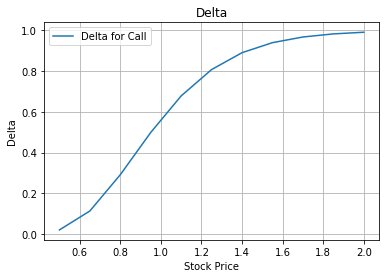

In [36]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])


In [38]:
d = delta(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.3051 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.3051 .


# GAMMA

In [39]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [40]:
gamma(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call') #value of gamma

1.3742197653964183

In [41]:
S = np.linspace(0.2, 2, 11) #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')

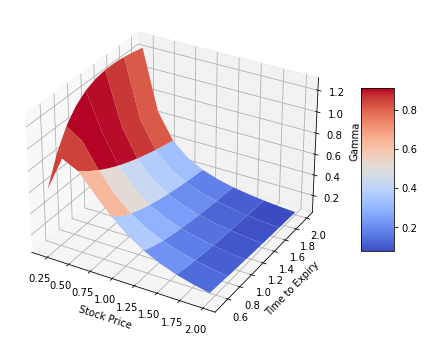

In [42]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [43]:
S = np.linspace(0.2,2,11) #plotting the 2d graph
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')

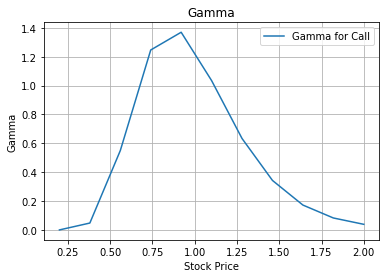

In [44]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [45]:
d = gamma(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 1.3742 . If the stock price increase 1 dollar, then the value of the option will increase $ 1.3742 .


# RHO

In [46]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [47]:
rho(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call') #value of rho

0.01705687110371804

In [48]:
S = np.linspace(0.2, 2, 11) #plotting the 3d graph of rho
T = np.linspace(0.5, 2, 11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')

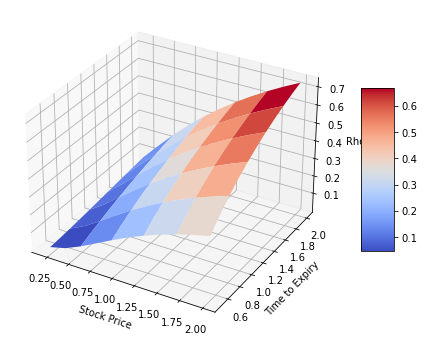

In [49]:
fig = plt.figure(figsize=(10, 6))  #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [50]:
r = np.linspace(0,0.1,11)  #plotting the 2d graph
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(0.81, 1.0, 1/12, r[i], 0.0055, 1.09, 'call')


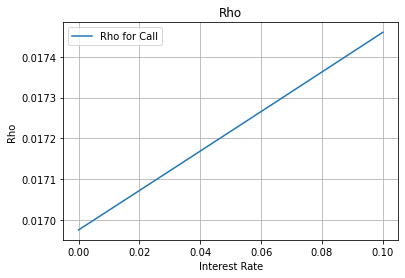

In [51]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])


In [52]:
r = rho(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', r.round(4)*0.01, '.')

The value of Rho is 0.0171 . If the interest rate increases 1%, then the value of the option will increase $ 0.000171 .


# VEGA

In [53]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [54]:
vega(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')  #value of vega

111.01959519341393

In [55]:
S = np.linspace(0.2, 2, 11) #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')


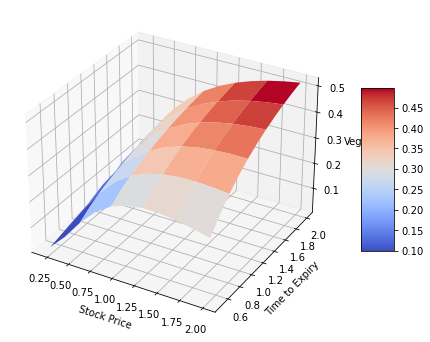

In [56]:
fig = plt.figure(figsize=(10, 6)) #dimensins of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [58]:
vol = np.linspace(0.1,0.3,11)    #plotting the 2d graph
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(0.81, 1.0, 1/12, 0.0169, 0.0055, vol[i], 'call')

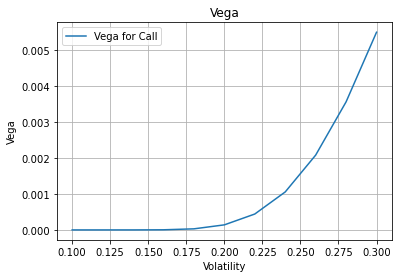

In [59]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [60]:
v = vega(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')


The value of Vega is 0.0819 . If the volatility increases 1%, then the value of the option will increase $ 0.0008190000000000001 .


# THETA

In [62]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [63]:
theta(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call') #value of theta 

0.5377105175926863

In [64]:
S = np.linspace(0.2, 2, 11)  #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')


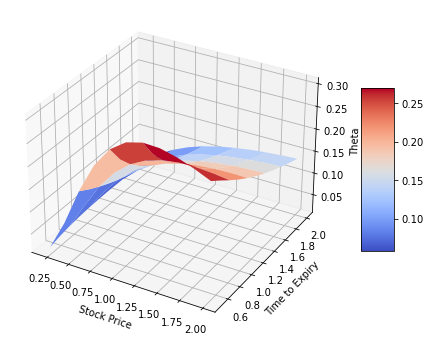

In [65]:
fig = plt.figure(figsize=(10, 6))    #dimensions of thr graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [66]:
T = np.linspace(0.25,3,11)   #plotting the 2d graph
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(0.81, 1.0, T[i], 0.0169, 0.0055, 1.09, 'call')

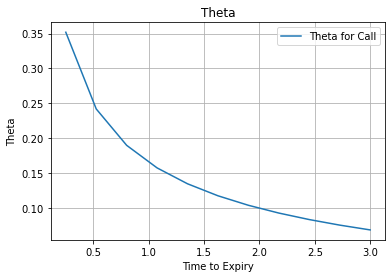

In [67]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [68]:
t = theta(0.81, 1.0, 1/12, 0.0169, 0.0055, 1.09, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')


The value of Theta is 0.5377 . If the time increases 1 year, then the value of the option will increase $ 0.005377 .
